# Data exploration
## Python 3

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
agg = pd.read_csv('house_1/channel_1.dat', header = None, names = ["Time","Power"], delim_whitespace = True, index_col = 0)
agg.index = pd.to_datetime(agg.index,unit='s')
agg.head()

/home/bjornif/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Power
Time,
2012-11-09 22:28:15,599
2012-11-09 22:28:21,582
2012-11-09 22:28:27,600
2012-11-09 22:28:33,586
2012-11-09 22:28:40,596


## 6-second resolution power signature 


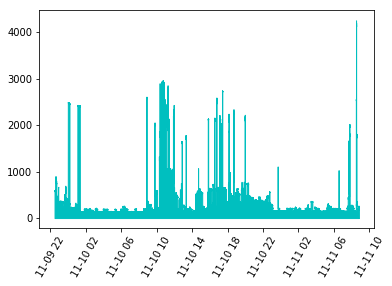

In [3]:
aggS = agg[0:18000]
plt.fill_between(aggS.index,aggS["Power"],0, color = 'c' )
plt.xticks(rotation=60)
plt.show()


## 15-minute resolution power signature (mean)

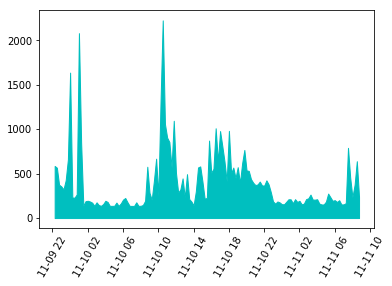

In [4]:
agg15S = aggS.resample('15T').mean()
#plt.plot(agg15[agg.index[0]:agg.index[18000]])
plt.fill_between(agg15S.index,agg15S["Power"],0, color = 'c')
plt.xticks(rotation=60)
plt.show()


## 15-minute resolution power signature (sample)

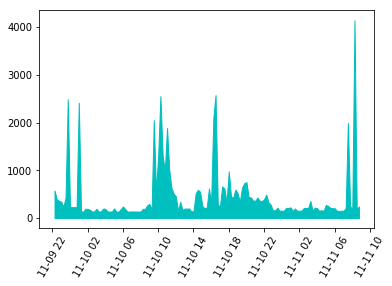

In [5]:
agg15S_sample = aggS.resample('15T').last()
plt.fill_between(agg15S_sample.index,agg15S_sample["Power"],0, color = 'c')
plt.xticks(rotation=60)
plt.show()

These graphs look very different. A useful idea may be to study the variance between different sampling intervals for both mean and sample methods.

## Extrapolating intervals

In [6]:
agg_sample = agg.resample('1T').last()
for i in range(2,50):
    agg_sample[str(i) + ' min'] = agg_sample["Power"].resample(str(i) + 'T').last()
    agg_sample[str(i) + ' min'] = agg_sample[str(i) + ' min'].fillna(method='bfill')


agg_sample.head()

,Power,2 min,3 min,4 min,5 min,6 min,7 min,8 min,9 min,10 min,...,40 min,41 min,42 min,43 min,44 min,45 min,46 min,47 min,48 min,49 min
Time,,,,,,,,,,,,,,,,,,,,,
2012-11-09 22:28:00,597.0,577.0,589.0,585.0,894.0,529.0,524.0,750.0,777.0,750.0,...,352.0,337.0,386.0,492.0,234.0,345.0,427.0,237.0,2491.0,668.0
2012-11-09 22:29:00,577.0,585.0,589.0,529.0,894.0,529.0,524.0,750.0,777.0,750.0,...,352.0,337.0,386.0,492.0,234.0,345.0,427.0,237.0,2491.0,668.0
2012-11-09 22:30:00,583.0,585.0,589.0,529.0,894.0,529.0,524.0,750.0,777.0,750.0,...,352.0,337.0,386.0,492.0,234.0,345.0,427.0,237.0,2491.0,668.0
2012-11-09 22:31:00,585.0,552.0,529.0,529.0,750.0,466.0,524.0,750.0,347.0,346.0,...,352.0,337.0,386.0,492.0,234.0,2491.0,427.0,237.0,2491.0,668.0
2012-11-09 22:32:00,589.0,552.0,529.0,529.0,750.0,466.0,392.0,750.0,347.0,346.0,...,352.0,337.0,386.0,492.0,234.0,2491.0,427.0,237.0,2491.0,668.0


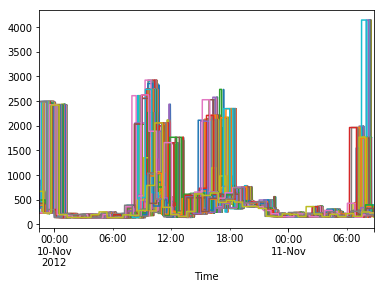

In [7]:
agg_sample_limited = agg_sample[agg.index[0]:agg.index[18000]]

agg_sample_limited.plot(alpha=1, legend=None)

plt.show()

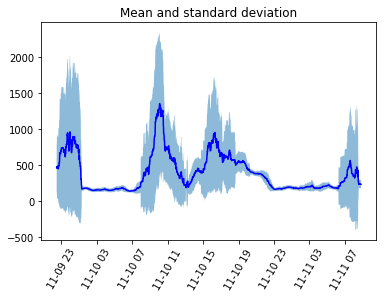

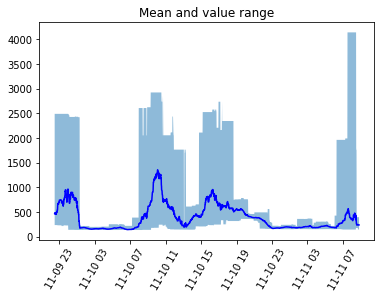

In [8]:
agg_std_limited = agg_sample_limited.std(axis=1)

agg_mean_limited = agg_sample_limited.mean(axis=1)

plt.plot(agg_mean_limited, color = 'b')
plt.fill_between(agg_mean_limited.index,agg_mean_limited + agg_std_limited, agg_mean_limited - agg_std_limited,
                 alpha = 0.5)
plt.title("Mean and standard deviation")
plt.xticks(rotation=60)
plt.show()
plt.plot(agg_mean_limited, color = 'b')
plt.fill_between(agg_mean_limited.index,agg_sample_limited.min(axis=1),agg_sample_limited.max(axis=1), alpha = 0.5)
plt.title("Mean and value range")
plt.xticks(rotation=60)
plt.show()

## Reporting averages
It is likely that AMI-meters will record a mean for a given period, and only delay the communication.

In [9]:
agg_mean = agg.resample('1T').mean()
for i in range(2,50):
    agg_mean[str(i) + ' min'] = agg_mean["Power"].resample(str(i) + 'T').mean()
    agg_mean[str(i) + ' min'] = agg_mean[str(i) + ' min'].fillna(method='bfill')


agg_mean.head()

,Power,2 min,3 min,4 min,5 min,6 min,7 min,8 min,9 min,10 min,...,40 min,41 min,42 min,43 min,44 min,45 min,46 min,47 min,48 min,49 min
Time,,,,,,,,,,,,,,,,,,,,,
2012-11-09 22:28:00,591.571429,586.857143,588.061111,587.699405,599.375556,611.238889,588.823810,617.169792,594.793519,611.444167,...,375.636528,421.503523,375.148847,349.714443,358.008369,431.022840,370.799491,355.042232,462.680199,362.134329
2012-11-09 22:29:00,582.142857,588.541667,588.061111,622.587500,599.375556,611.238889,588.823810,617.169792,594.793519,611.444167,...,375.636528,421.503523,375.148847,349.714443,358.008369,431.022840,370.799491,355.042232,462.680199,362.134329
2012-11-09 22:30:00,586.750000,588.541667,588.061111,622.587500,599.375556,611.238889,588.823810,617.169792,594.793519,611.444167,...,375.636528,421.503523,375.148847,349.714443,358.008369,431.022840,370.799491,355.042232,462.680199,362.134329
2012-11-09 22:31:00,590.333333,579.175000,634.416667,622.587500,623.512778,571.979167,588.823810,617.169792,462.812963,409.521667,...,375.636528,421.503523,375.148847,349.714443,358.008369,470.175545,370.799491,355.042232,462.680199,362.134329
2012-11-09 22:32:00,587.100000,579.175000,634.416667,622.587500,623.512778,571.979167,530.980952,617.169792,462.812963,409.521667,...,375.636528,421.503523,375.148847,349.714443,358.008369,470.175545,370.799491,355.042232,462.680199,362.134329


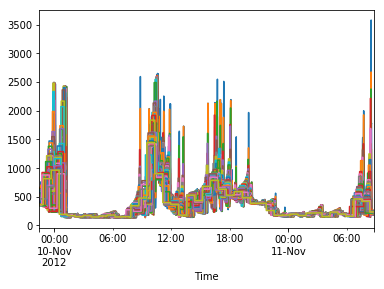

In [10]:
agg_mean_limited = agg_mean[agg.index[0]:agg.index[18000]]

agg_mean_limited.plot(alpha=1, legend=None)

plt.show()

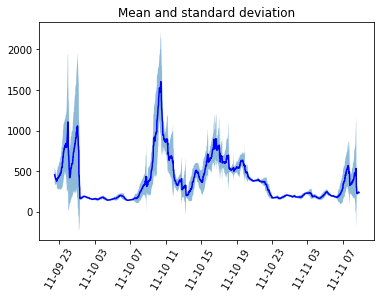

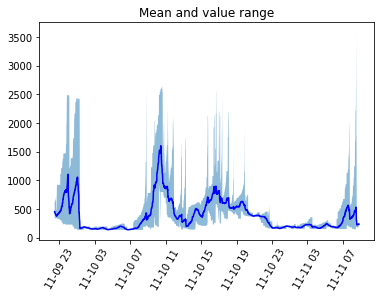

In [11]:
agg_std_m_limited = agg_mean_limited.std(axis=1)

agg_mean_m_limited = agg_mean_limited.mean(axis=1)

plt.plot(agg_mean_m_limited, color = 'b')
plt.fill_between(agg_mean_m_limited.index,agg_mean_m_limited + agg_std_m_limited, agg_mean_m_limited - agg_std_m_limited,
                 alpha = 0.5)
plt.title("Mean and standard deviation")
plt.xticks(rotation=60)
plt.show()
plt.plot(agg_mean_m_limited, color = 'b')
plt.fill_between(agg_mean_m_limited.index,agg_mean_limited.min(axis=1),agg_mean_limited.max(axis=1), alpha = 0.5)
plt.title("Mean and value range")
plt.xticks(rotation=60)
plt.show()

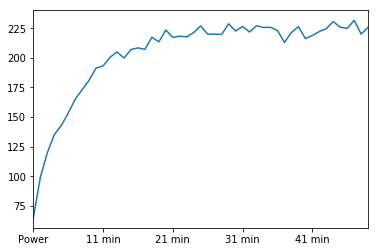

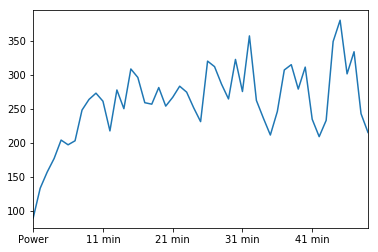

In [12]:

agg_1s = agg.resample('1s').bfill()
agg_limited_1s = agg_1s[agg_sample_limited.index[0]:agg_sample_limited.index[-1]]
agg_sample_limited_1s = agg_sample_limited.resample('1s').bfill()
agg_mean_limited_1s = agg_mean_limited.resample('1s').bfill()


rmse_sample_estimate = np.sum(np.sqrt(np.subtract(agg_sample_limited_1s,agg_limited_1s)**2))/agg_limited_1s.shape[0]
rmse_mean_estimate = np.sum(np.sqrt(np.subtract(agg_mean_limited_1s,agg_limited_1s)**2))/agg_limited_1s.shape[0]

#print(rmse_sample_estimate,"\n\n",rmse_mean_estimate, "\n\n", rmse_mean_estimate - rmse_sample_estimate)

rmse_mean_estimate.plot()
plt.show()
rmse_sample_estimate.plot()
plt.show()

It appears that the signal rapidly deteriorates as the measurement intervals incerase, flattening out at intervals of around 12 minutes for mean intervals, and around 9 minutes for sampling. However the estimated signal loss is far lower, and more robust, for the mean method than for sampling.

In [4]:
import time

start = time.time()
for i in range(1):
    agg.drop(agg.iloc[:1000].index)
end = time.time()


start2 = time.time()
for i in range(1):
    agg.append(agg.iloc[:1000])
end2 = time.time()

print("DROP TIME: ", (end-start)*1000)
print("APPEND TIME: ", (end2-start2)*1000)

DROP TIME:  1556.6954612731934
APPEND TIME:  70.45316696166992
